1. Consider the two dimensional data matrix [(2, 1), (3, 4), (5, 0), (7, 6), (9, 2)].
Implement principal component analysis. Use this to obtain the feature in transformed
2D feature space. Plot the scatter plot of data points in both the original as well as
transformed domain.

In [6]:
import numpy as np
import matplotlib.pyplot as plt


In [7]:

data_matrix = np.array([(2, 1), (3, 4), (5, 0), (7, 6), (9, 2)])

mean = np.mean(data_matrix, axis=0)
normalized_data = data_matrix - mean

cov_matrix = np.cov(normalized_data, rowvar=False)

eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

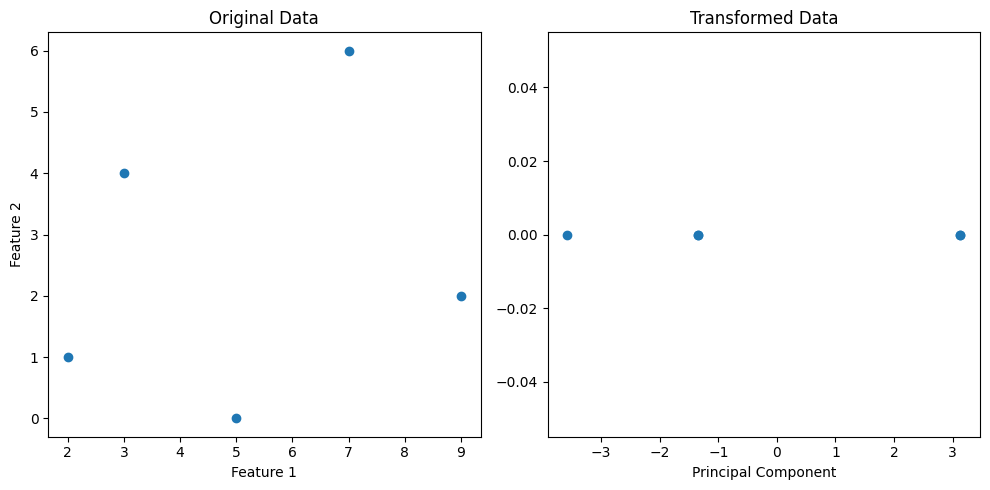

In [8]:
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvectors = eigenvectors[:, sorted_indices]

k = 1 
top_eigenvectors = eigenvectors[:, :k]

transformed_data = np.dot(normalized_data, top_eigenvectors)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(data_matrix[:, 0], data_matrix[:, 1])
plt.title('Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(1, 2, 2)
plt.scatter(transformed_data[:, 0], np.zeros_like(transformed_data))
plt.title('Transformed Data')
plt.xlabel('Principal Component')
plt.ylabel('')

plt.tight_layout()
plt.show()

2. Implement Principal Component Analysis Algorithm and use it to reduce dimensions
of Iris Dataset (from 4D to 2D). Plot the scatter plot for samples in the transformed
domain with different colour codes for samples belonging to different classes.

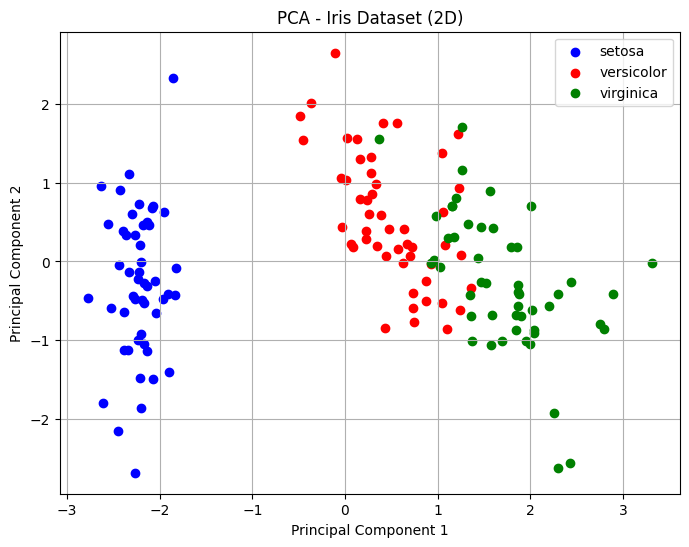

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Standardize the features
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_standardized = (X - X_mean) / X_std

# Compute covariance matrix
cov_matrix = np.cov(X_standardized, rowvar=False)

# Compute eigenvalues and eigenvectors of covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort eigenvalues and corresponding eigenvectors in descending order
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

# Choose the top k eigenvectors (k=2 for 2D transformation)
k = 2
top_eigenvectors = eigenvectors[:, :k]

# Project the data onto the new subspace
transformed_data = np.dot(X_standardized, top_eigenvectors)

# Plot scatter plot with different colors for different classes
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']
for i in range(3):
    plt.scatter(transformed_data[y == i, 0], transformed_data[y == i, 1], color=colors[i], label=iris.target_names[i])

plt.title('PCA - Iris Dataset (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()